In [5]:

import os
os.environ['REQUESTS_CA_BUNDLE'] = '/home/philips/Cisco_Umbrella_Root_CA.crt'
os.environ['SSL_CERT_FILE'] = '/home/philips/Cisco_Umbrella_Root_CA.crt'


In [6]:
from transformers import GPT2LMHeadModel

In [14]:
model = GPT2LMHeadModel.from_pretrained("gpt2")
sd = model.state_dict()


print(sd)

OrderedDict({'transformer.wte.weight': tensor([[-0.1101, -0.0393,  0.0331,  ..., -0.1364,  0.0151,  0.0453],
        [ 0.0403, -0.0486,  0.0462,  ...,  0.0861,  0.0025,  0.0432],
        [-0.1275,  0.0479,  0.1841,  ...,  0.0899, -0.1297, -0.0879],
        ...,
        [-0.0445, -0.0548,  0.0123,  ...,  0.1044,  0.0978, -0.0695],
        [ 0.1860,  0.0167,  0.0461,  ..., -0.0963,  0.0785, -0.0225],
        [ 0.0514, -0.0277,  0.0499,  ...,  0.0070,  0.1552,  0.1207]]), 'transformer.wpe.weight': tensor([[-1.8821e-02, -1.9742e-01,  4.0267e-03,  ..., -4.3044e-02,
          2.8267e-02,  5.4490e-02],
        [ 2.3959e-02, -5.3792e-02, -9.4879e-02,  ...,  3.4170e-02,
          1.0172e-02, -1.5573e-04],
        [ 4.2161e-03, -8.4764e-02,  5.4515e-02,  ...,  1.9745e-02,
          1.9325e-02, -2.1424e-02],
        ...,
        [-1.7987e-03,  1.6052e-03, -5.5103e-02,  ...,  1.3617e-02,
         -7.1805e-03,  3.7552e-03],
        [ 3.2105e-03,  1.5501e-03, -4.8944e-02,  ...,  2.0725e-02,
        

In [9]:
for k , v in sd.items():
    print(k, v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [ ]:
sd["transformer.wpe.weight"].view(-1)[:20]

tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565, -0.0025,  0.0135, -0.0042,  0.0151,  0.0166, -0.1381,
        -0.0063, -0.0461,  0.0267, -0.2042])

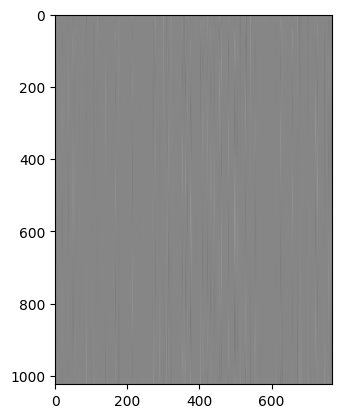

In [13]:
import matplotlib.pyplot as plt 
%matplotlib inline 

plt.imshow(sd["transformer.wpe.weight"], cmap='gray')

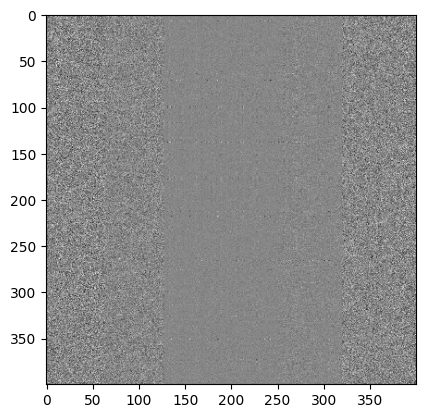

In [16]:
plt.imshow(sd["transformer.h.1.attn.c_attn.weight"][:400,:400], cmap="gray")

In [17]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='gpt2')

set_seed(42)
generator("Hello, I'm a language model,", max_length=30, num_return_sequences=5)

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': 'Hello, I\'m a language model, so you can\'t just use the same data model and just use different languages. There\'s a lot of overlap between languages because there are so many different languages.\n\nBut in a lot of cases, I have a lot of different languages. There is a lot of confusion about what\'s right. I sometimes have to put a lot of stuff in the right order, but then it\'s not so clear what it is. Sometimes there are multiple languages that are using different languages. So I have a lot of confusion.\n\nSo, for example, if you\'re doing a lot of cross-platform development, where you\'re developing for a large cross-platform platform, you\'re using a lot of different languages. And you may not be able to understand the language. But if you do a lot of cross-platform development, you can understand the language.\n\nAnd so there\'s a lot of confusion.\n\nWhen I talk to people about languages, I\'m kind of using the same language, but it\'s different.\n\nSo, I 

In [1]:
#read the input.txt file 

with open("input.txt", "r") as f:
    data = f.read()

print(data[:20])

First Citizen:
Befor


In [2]:
import tiktoken
enc = tiktoken.get_encoding("gpt2")

tokens = enc.encode(data)
print(tokens[:24])

[5962, 22307, 25, 198, 8421, 356, 5120, 597, 2252, 11, 3285, 502, 2740, 13, 198, 198, 3237, 25, 198, 5248, 461, 11, 2740, 13]


In [6]:
import torch 
buf = torch.tensor(tokens[:24])
print(buf.shape)
x = buf.view(4,6)

print(x)

torch.Size([24])
tensor([[ 5962, 22307,    25,   198,  8421,   356],
        [ 5120,   597,  2252,    11,  3285,   502],
        [ 2740,    13,   198,   198,  3237,    25],
        [  198,  5248,   461,    11,  2740,    13]])


In [ ]:
import torch 
buf = torch.tensor(tokens[:24+1])
x = buf[:-1].view(4,6)
y = buf[1:].view(4,6)
print(x)
print(y)

tensor([[ 5962, 22307,    25,   198,  8421,   356],
        [ 5120,   597,  2252,    11,  3285,   502],
        [ 2740,    13,   198,   198,  3237,    25],
        [  198,  5248,   461,    11,  2740,    13]])
tensor([[22307,    25,   198,  8421,   356,  5120],
        [  597,  2252,    11,  3285,   502,  2740],
        [   13,   198,   198,  3237,    25,   198],
        [ 5248,   461,    11,  2740,    13,   198]])


In [12]:
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))

1
NVIDIA RTX A6000


| Step                | Variable                | Shape         | Example Value           |
|---------------------|------------------------|---------------|------------------------|
| Input               | x, y                   | (B, T)        | (4, 32)                |
| Token Embedding     | tok_emb                | (B, T, C)     | (4, 32, 768)           |
| Position Embedding  | pos_emb                | (T, C)        | (32, 768)              |
| After Blocks        | x                      | (B, T, C)     | (4, 32, 768)           |
| Logits              | logits                 | (B, T, V)     | (4, 32, 50257)         |
| Flattened Logits    | logits.view(-1, V)     | (B*T, V)      | (128, 50257)           |
| Flattened Targets   | y.view(-1)             | (B*T,)        | (128,)                 |
| Loss                | loss                   | scalar        | e.g. 4.23              |

```python
# B,T = 4,32
buf = torch.tensor(tokens[:B*T + 1]) # buffer of token indices 4*32=128 + 1 
x = buf[:-1].view(B,T) # (B, T) = (4, 32) input token indices
y = buf[1:].view(B,T) # (B, T) = (4, 32) target token indices

# get logits 
model = GPT(GPTConfig())
model.to(device)
logits, loss = model(x, y)
```

This is the demo forward pass

```python
def forward(self, idx, targets=None):
    B, T = idx.size() # 4,32

    assert T <= self.config.block_size, f"Cannot forward sequence of length {T}, block size is only {self.config.block_size}"

    pos = torch.arange(0, T, dtype=torch.long, device=idx.device)
    pos_emb = self.transformer.wpe(pos) # positional embd of shape (T, n_embd( C = 768)) = (32, 768)
    tok_emb = self.transformer.wte(idx) # token embd of shape ( B, T, n_embd) = (4,32,768)

    # here automatic conversion happens 
    x = tok_emb + pos_emb # (B, T, n_embd) # (4, 32, 768) input token indices + positional embedding

    for block in self.transformer.h:
        x = block(x)
    
    x = self.transformer.ln_f(x) # each x is ( B, T, C) = ( 4, 32, 768)
    logits = self.lm_head(x) # (B, T, V) = (4, 32, 50257) logits for each token in the vocabulary

    # logits.view(-1, logits.size(-1)) ( B*T, V) = (128, 50257)
    # y.view(-1) ( B*T) = (128,)
    loss = None
    if targets is not None:
        loss = F.cross_entropy(logits.view(-1, logits.size(-1)), targets.view(-1))
    return logits, loss
```